In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import Odin

# validation test for scalar convection + diffusion
# this validation test follows "H K Versteeg and W Malalasekera, An Introduction to Computational Fluid Dynamics
# THE FINITE VOLUME METHOD, Second Edition, 2007" examples 5.1

# the temperature along the x-axis should develop as:
def yFunc(x, case):
    if case == 1:
        return (2.7183-np.exp(x))/1.7183
    else:
        return 1+(1-np.exp(25*x))/(7.2e10)

case = 3   # 1,2,3

# geometric parameters
LenX = 1
LenY = 0.3
resolution = 20 if case == 3 else 5

#velocity in x direction: [ m/s ]
velX = 0.1 if case == 1 else 2.5

# thermal conductivity [ W / (m K) ]
k = 0.1

# const temperature at left/right boundaries [K]
T_l = 1
T_r = 0

geom = Odin.createGeometry( 'rectangle', [LenX, LenY] )
mesh = Odin.createMesh( geom, res=resolution )

# example: incompressible flow but with temp-dep density, i.e. BoussinesqFlow
# mulitphase stokes flow
myFlowModels = {
    'T' : Odin.TransportModels.scalarTransport
}

passiveFields = {
    'u' : 'faces_u',
    'v' : 'faces_v'
}

sim1 = Odin.Simulation(myFlowModels, mesh, geom, passiveFields )

myFields = sim1.fieldRegistry
print(myFields)

T = myFields['T']
T.govModel.setDiffusionCoefficient(value=k)

u = myFields['u']
u.data.fill(velX)

# changing boundary conditions
Odin.defineBoundaryCondition(field=T, boundaryName='top', type='zeroGradient')
Odin.defineBoundaryCondition(field=T, boundaryName='bottom', type='zeroGradient')
Odin.defineBoundaryCondition(field=T, boundaryName='left', type='fixedValue', value=T_l )
Odin.defineBoundaryCondition(field=T, boundaryName='right', type='fixedValue', value=T_r )

#Odin.updateSource(field=T, value=0.0, mesh=mesh )

T.data = Odin.solve(T)

{'invCellDist': (array([[20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20.]]), array([[20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20.],
       [20., 20

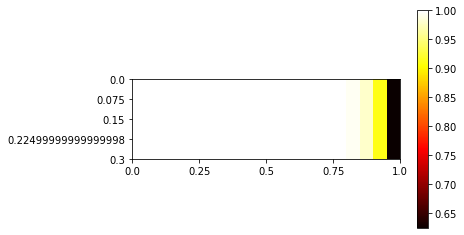

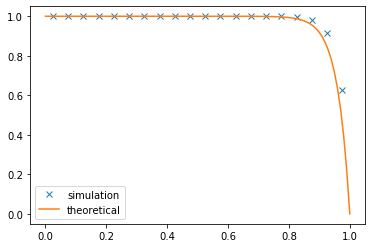

[1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999996 0.99999984 0.9999993  0.99999698
 0.99998693 0.99994336 0.99975457 0.99893649 0.99539144 0.98002959
 0.91346154 0.625     ]


In [2]:
# post-processing:
import numpy as np
import matplotlib.pyplot as plt

sim1.display(T, mesh)

nbcellsX = sim1.mesh.cells_x
cellSpacing = sim1.mesh.uniformSpacing
L = geom.lenX

xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX)
ySim = T.data[0,:]

xTheo = np.linspace(0,LenX, 100)
yTheor = np.array([yFunc(x, case) for x in xTheo])

ax = plt.gca()
ax.plot(xSim, ySim, 'x', label='simulation')
ax.plot(xTheo, yTheor, label='theoretical')

plt.legend()
plt.show()

print(ySim)

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)